<a href="https://colab.research.google.com/github/JuanDaGue/GitHub/blob/master/PS2_N%C3%BAmerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spiceypy


     |████████████████████████████████| 184kB 5.1MB/s 
     |████████████████████████████████| 20.4MB 42.9MB/s 
  Created wheel for spiceypy: filename=spiceypy-2.3.0-cp36-cp36m-linux_x86_64.whl size=1743032 sha256=875017981830b4eb404963ed16eb848a309cdd86053df3c268956708c9798a60
  Stored in directory: /root/.cache/pip/wheels/61/58/d1/82b56075243172909ab740562a6b61dcc981f4cd3ab925d861
Successfully built spiceypy
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import spiceypy as spy
from spiceypy import conics
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
#from meccel import *
#%matplotlib nbagg
##Tengo un problema con el mecel por eso tengo que importar cada libreria por aparte

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['spy', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#Problem set 2 Juan David Guerrero U. C.C 1059705736

# Problemas Numericos

##DESARROLO

# 10. Sistema Solar. 
Dibujar las órbitas de todos los planetas del Sistema Solar a escala usando para ello los elementos orbitales calculados por el sistema Horizons Web Interface de NASA.

In [ ]:
#elementos orbitales de  los panetas , excentricidad (ET), inclinacion(IN), longitud del nodo ascendente(),argumentos del periabsis(),
#etc

mercurio= dict(EC= 2.056467022929208E-01, QR= 3.074922916106339E-01, IN= 7.003897133361579E+00,
 OM= 4.830781237194164E+01, W = 2.917855257514649E+01, Tp=  2458363.897356175352,
 N = 4.092355132439918E+00, MA= 3.338197466209226E+02, TA= 3.204788062238426E+02,
 A = 3.870976459696436E-01, AD= 4.667030003286534E-01, PR= 8.796890503130970E+01 )

venus= dict( EC= 6.794904161412642E-03, QR= 7.184135163358071E-01, IN= 3.394496611535968E+00,
 OM= 7.662817381996850E+01, W = 5.483067653491413E+01, Tp=  2458254.489907905925,
 N = 1.602142983661626E+00, MA= 1.650368962948502E+02, TA= 1.652363012597559E+02,
 A = 7.233284639254020E-01, AD= 7.282434115149968E-01, PR= 2.246990460097613E+02)

tierra = dict( EC= 1.720055278400754E-02, QR= 9.819634980365578E-01, IN= 1.139285891810581E-03,
 OM= 2.137860393896699E+02, W = 2.514502706048688E+02, Tp=  2458489.550495270174,
 N = 9.868679956549407E-01, MA= 2.296835924074850E+02, TA= 2.282015052090065E+02,
 A = 9.991494203809306E-01, AD= 1.016335342725303E+00, PR= 3.647904295052996E+02 )

marte = dict(EC= 9.333938071892184E-02, QR= 1.381443497742091E+00, IN= 1.848139401045893E+00,
 OM= 4.950467433101749E+01, W = 2.866728689291382E+02, Tp=  2458378.025618202984,
 N = 5.240486215881404E-01, MA= 3.492435780735279E+02, TA= 3.469910591221272E+02,
 A = 1.523661079310452E+00, AD= 1.665878660878814E+00, PR= 6.869591583105637E+02)

jupiter = dict(EC= 4.872935110529547E-02, QR= 4.949507028740815E+00, IN= 1.303835727944965E+00,
 OM= 1.005095590810107E+02, W = 2.736318939165268E+02, Tp=  2459966.611988043878,
 N = 8.308535694361879E-02, MA= 2.253093318277885E+02, TA= 2.215057082891999E+02,
 A = 5.203048190850544E+00, AD= 5.456589352960273E+00, PR= 4.332893463336671E+03)

saturno = dict(EC= 5.114934064226614E-02, QR= 9.086091958489831E+00, IN= 2.483825062467459E+00,
 OM= 1.136121478484292E+02, W = 3.396201788358905E+02, Tp=  2463629.885573334061,
 N = 3.326574336081060E-02, MA= 1.842109856978944E+02, TA= 1.838064532302473E+02,
 A = 9.575892548401770E+00, AD= 1.006569313831371E+01, PR= 1.082194364621070E+04)

urano = dict(EC= 4.866059427331471E-02, QR= 1.820739382330871E+01, IN= 7.699653414087587E-01,
 OM= 7.412952808384176E+01, W = 9.959350813737898E+01, Tp=  2470309.174321825150,
 N = 1.177186042252285E-02, MA= 2.191652957429557E+02, TA= 2.158044425885119E+02,
 A = 1.913869404936601E+01, AD= 2.006999427542332E+01, PR= 3.058140235091641E+04)

neptuno = dict(EC= 7.217656716328198E-03, QR= 2.986965252854733E+01, IN= 1.766980664806536E+00,
 OM= 1.317094878243790E+02, W = 2.610739016810647E+02, Tp=  2466295.952391518746,
 N = 5.972430002539800E-03, MA= 3.125164796031298E+02, TA= 3.119031239941236E+02,
 A = 3.008680878605488E+01, AD= 3.030396504356243E+01, PR= 6.027697266387526E+04)
pl=[mercurio,venus,tierra,marte,jupiter,saturno,urano,neptuno]#palnetas
GRADOS=180/np.pi

In [ ]:
q=np.zeros(len(pl))
M=np.linspace(0,2*np.pi,100) #" Determina la orbita del pnaeta"
xt=np.zeros((len(M),len(pl)))#x de todos los planetas
yt=np.zeros((len(M),len(pl)))#y de todos los planetas
zt=np.zeros((len(M),len(pl)))#z de todos los planetas
for j in range(len(pl)): #"ejecuta los planetas en el orden que se encuentran en pl"
    q[j]=pl[j]["A"]*(1-pl[j]["EC"])

    #calculando las orbitas de los planetas
    for i in range(len(M)):
        xt[i][j],yt[i][j],zt[i][j],vx,vy,vz=conics(
                                            [q[j],
                                             pl[j]["EC"],
                                             pl[j]["IN"]*GRADOS,
                                             pl[j]["OM"]*GRADOS,
                                             pl[j]["W"]*GRADOS,
                                             M[i],
                                             0,1],
                                            0)


(-17, 17)

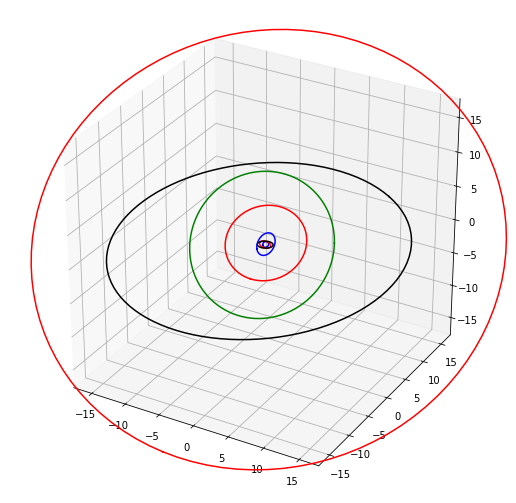

In [ ]:
#Graficando los orbitas de los planetas

fig=plt.figure(figsize=(9,9))
Col=['b','r','black','b','r','g','black','r']
ax=fig.add_subplot(111,projection='3d')
for i in range(len(pl)):
    ax.plot(xt[:,i],yt[:,i],zt[:,i], color=Col[i])
max=17
ax.set_xlim((-max,max))
ax.set_ylim((-max,max))
ax.set_zlim((-max,max))

# 10. Simulaci ́on de N cuerpos. 
En los adjuntos encontrará el programa MecCel-SimulacionNCuerpos.ipynb. Debe descargarlo y guardarlo en una carpeta junto con los archivos meccel.py y meccel.conf. En  éste hay una rutina con una posible solución numérica

al problema de N cuerpos. Usela para integrar numéricamente las ecuaciones para un sistema planetario de cuatro cuerpos con masas $m1 = 0,33M, m2 = 5,94M⊕, m3 = 3,86M⊕,m4 = 5,21M⊕$. Suponga que $m1$ es la estrella central y se encuentra en reposo en el origen
y $m2, m3 y m4$ tienen períodos orbitales en días de $7,2$ , $28,123$ y $92,092$ respectivamente.
Deduzca condiciones iniciales aproximadas y apropiadas para que el sistema sea estable, es decir para que $m2$, $m3$ y $m4$ describan  ́orbitas el ́ıpticas alrededor de $m1$.

# Solución

Construímos primero el sistema de unidades:


In [ ]:


#Unidades
G=6.67408e-11 # m^3/(kg s^2)
UL=149597870.693e3 #m
UM=1.98e30 #kg
UT=np.sqrt(UL**3/(UM*G))
UV=UL/UT
UL,UM,UT,UV

#Otras cantidades
DAY=86400 #s


Las condiciones provistas son



In [ ]:
MEARTH=5.98E24
masa1=0.33 #UM
masa2=5.94*MEARTH/UM
masa3=3.86*MEARTH/UM
masa4=5.21*MEARTH/UM

periodo2=7.2*DAY/UT
periodo3=28.123*DAY/UT
periodo4=92.092*DAY/UT


Calculamos los semiejes mayores de las órbitas:

In [ ]:
a2=((masa1+masa2)/(2*np.pi/periodo2)**2)**(1./3)
a3=((masa1+masa3)/(2*np.pi/periodo3)**2)**(1./3)
a4=((masa1+masa3)/(2*np.pi/periodo4)**2)**(1./3)
a2,a3,a4

(0.05035588319429848, 0.12489169566128414, 0.27540621338545107)

Asumiendo una órbita circular la velocidad constante sobre la órbita será:

In [ ]:
v2=2*np.pi*a2/periodo2
v3=2*np.pi*a3/periodo3
v4=2*np.pi*a4/periodo4
v2,v3,v4

(2.5600218129997665, 1.6255407457027513, 1.094656282626579)

Con estas condiciones podemos construir el sistema así:

In [ ]:
#Sistema
sistema=dict(
    particula1=dict(
        m=masa1,
        r=[0,0,0],
        v=[0,0,0]
    ),
    particula2=dict(
        m=masa2,
        r=[a2,0,0],
        v=[0,v2,0]
    ),
    particula3=dict(
        m=masa3,
        r=[a3,0,0],
        v=[0,v3,0]
    ),
    particula4=dict(
        m=masa4,
        r=[a4,0,0],
        v=[0,v4,0]
    ),
)

Integramos numéricamente el sistema:

In [ ]:
tini=0
tend=10
Nt=300
rs,vs,masas,N=solucionNbody(sistema,tini,tend,Nt)

NameError: ignored

Una gráfica del sistema será:

In [ ]:
fig=plt.figure()
ax=Axes3D(fig)

ax.plot(rs[0,:,0],rs[0,:,1],rs[0,:,2])
ax.plot(rs[1,:,0],rs[1,:,1],rs[1,:,2])
ax.plot(rs[2,:,0],rs[2,:,1],rs[2,:,2])
ax.plot(rs[3,:,0],rs[3,:,1],rs[3,:,2])

max=a4
ax.set_xlim((-max,max))
ax.set_ylim((-max,max))
ax.set_zlim((-max,max))

In [ ]:
#Preparación de la solución
y,masas,N=sis2ini(sistema)
#Solución
solucion=odeint(EoM_Nbody,y,np.linspace(0,T,Nt),args=(masas,))
#Extracción de la solución
rs,vs=sol2pos(solucion)
#En el centro de masa
rs,vs=in2cm(rs,vs,masas,Nt,N)

#Gráfico
fig2d = plt.figure(figsize=(6,6))
ax2d=fig2d.gca()

for i in range(N):
    # Grafica en 2D
    line,=ax2d.plot(rs[i,0,0],rs[i,0,1],'o',markersize=10,markeredgecolor='none')
    color=line.get_color()
    ax2d.plot(rs[i,:,0],rs[i,:,1],color=color)
    ax2d.plot(rs[i,-1,0],rs[i,-1,1],'s',markersize=10,markeredgecolor='none',color=color,label="P%d"%(i+1))
        
ax2d.legend(loc='best')
ext=np.abs(rs[:,:,:2]).max()
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)

In [ ]:
#Preparación de la solución
y,masas,N=sis2ini(sistema)